<a href="https://colab.research.google.com/github/jude-san/indabax_hackathon/blob/main/Items_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ydata_profiling

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dummy Dataset for Challenge #1.xlsx to Dummy Dataset for Challenge #1.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# loaded database into colab
df = pd.read_excel('Dummy Dataset for Challenge #1.xlsx', sheet_name='Database')

In [ ]:
# Display the first few rows of the dataframe to verify
df.head(100)

,Period,City,Channel,Category,Segment,Manufacturer,Brand,Item Name,Pack_Size,Packaging,Unit_Price,Sales_Volume(KG_LTRS),Sales_Value
0,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,ALYSSA,ALYSSA SPAGHETTI 200G SACHET,200G,SACHET,89.0625,66795.658,2.128648e+07
1,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN SUPERIOR QUALITY FOOD PASTA 200G SACHET,200G,SACHET,99.7500,72729.168,2.658084e+07
2,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN VERMICELLI 200G SACHET,200G,SACHET,99.7500,56039.689,2.048124e+07
3,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.1 SPAGHETTI 200G SACHET,200G,SACHET,99.7500,18220.535,6.659200e+06
4,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.5 SPAGHETTI 200G SACHET,200G,SACHET,99.7500,376047.594,1.363817e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-03-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.5 SPAGHETTI 200G SACHET,200G,SACHET,99.7500,361310.011,1.315792e+08
96,2021-03-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,ALYSSA,ALYSSA SPAGHETTI 200G SACHET,200G,SACHET,85.5000,32283.772,1.011347e+07
97,2021-03-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,BLE D'OR,BLE D'OR 200G SACHET,200G,SACHET,71.2500,97412.102,2.542994e+07
98,2021-03-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN SUPERIOR QUALITY FOOD PASTA 200G SACHET,200G,SACHET,99.7500,15314.568,5.597141e+06


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.isna().sum()

Period                   0
City                     0
Channel                  0
Category                 0
Segment                  0
Manufacturer             0
Brand                    0
Item Name                0
Pack_Size                0
Packaging                0
Unit_Price               0
Sales_Volume(KG_LTRS)    0
Sales_Value              0
dtype: int64

In [ ]:
df.nunique()

Period                     24
City                        2
Channel                     3
Category                    1
Segment                     1
Manufacturer               12
Brand                      16
Item Name                  36
Pack_Size                   6
Packaging                   2
Unit_Price                140
Sales_Volume(KG_LTRS)    1143
Sales_Value              1180
dtype: int64

In [ ]:
profile = ProfileReport(df, title="Profiling Report for Retail dataset")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***
# Time series analysis

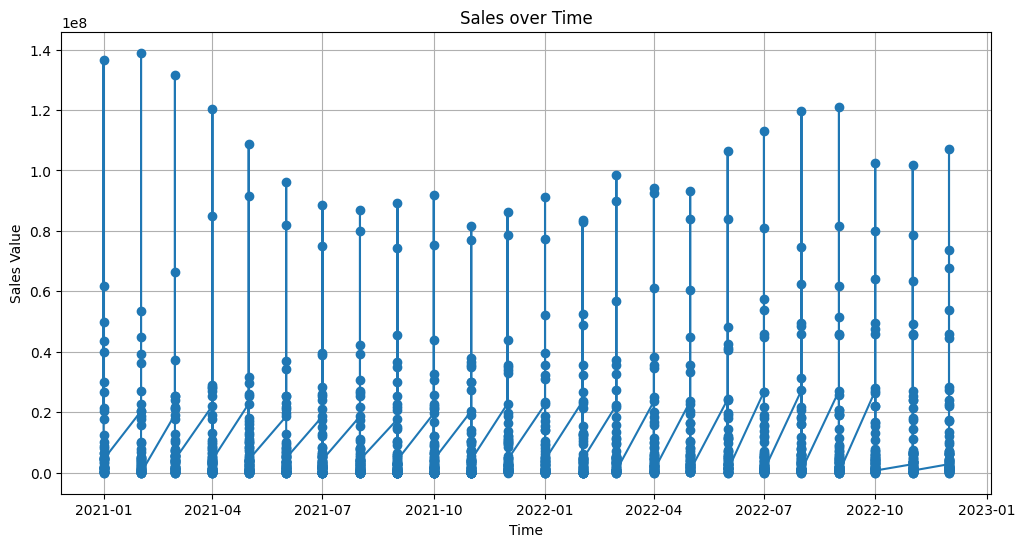

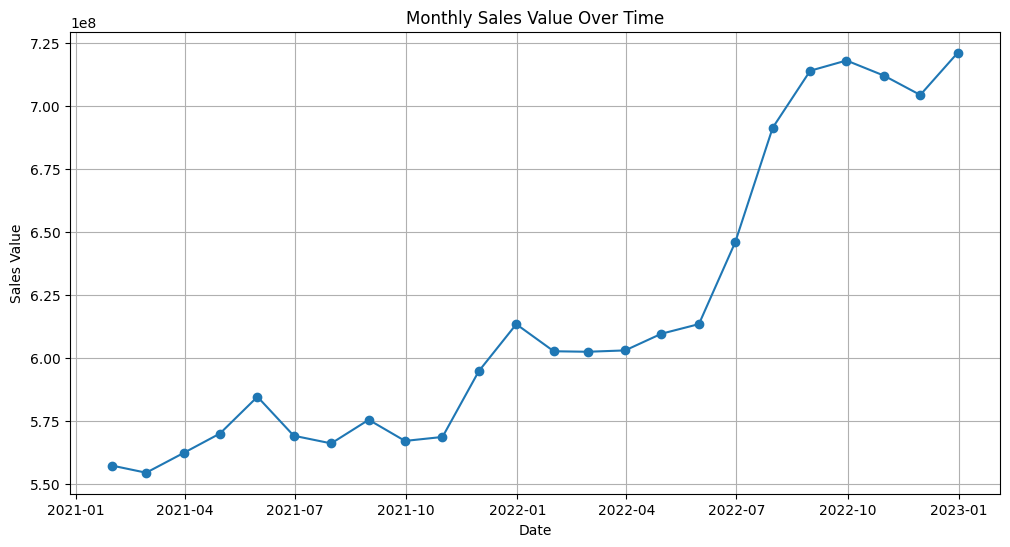

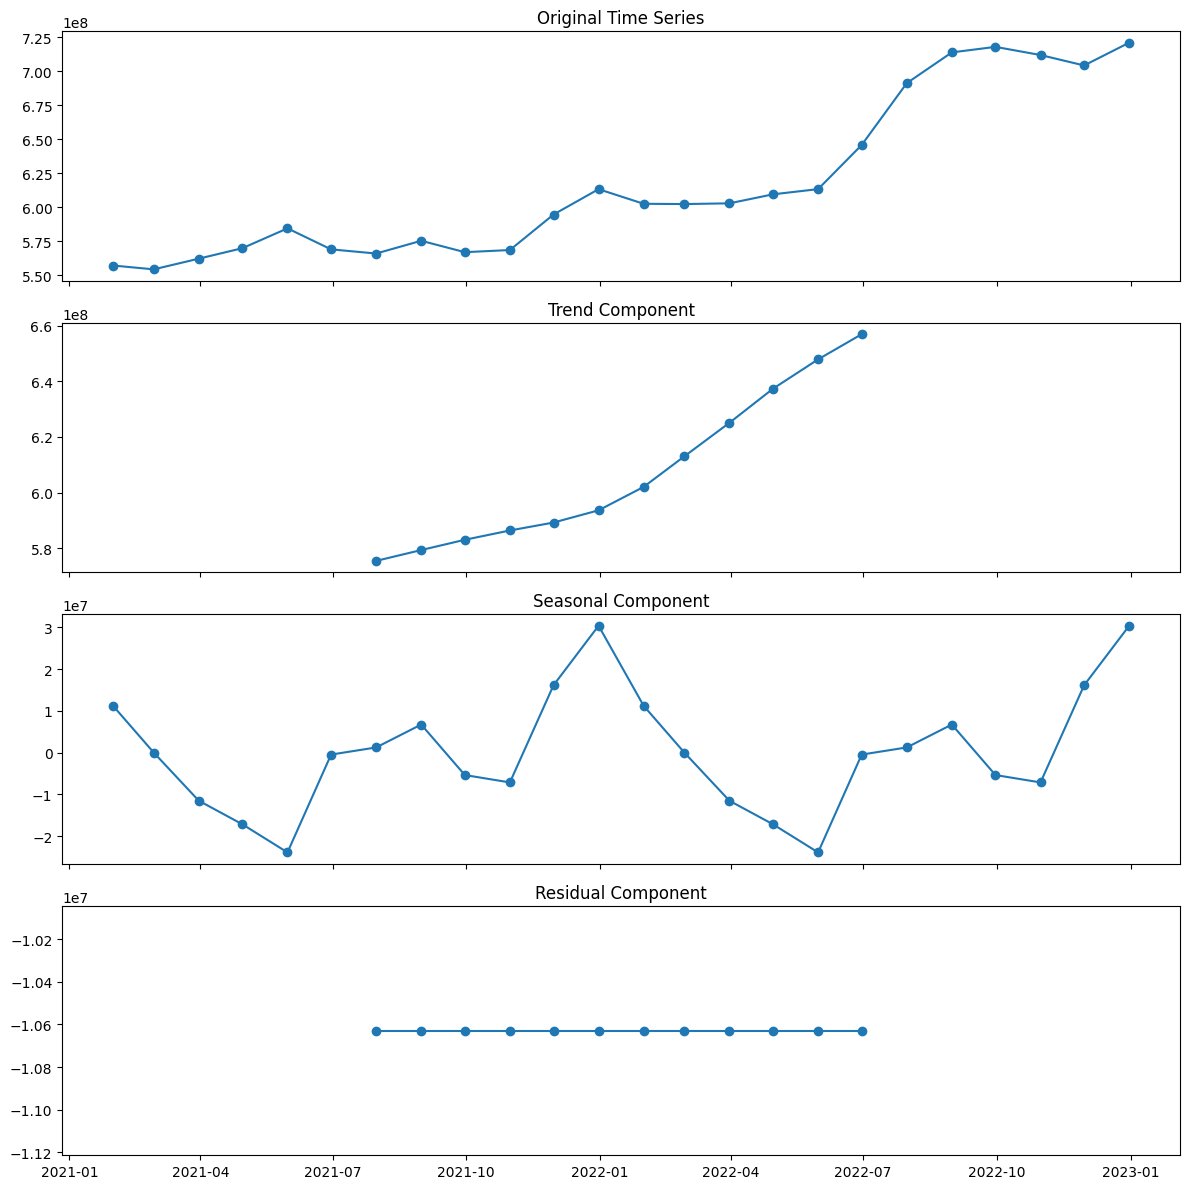

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


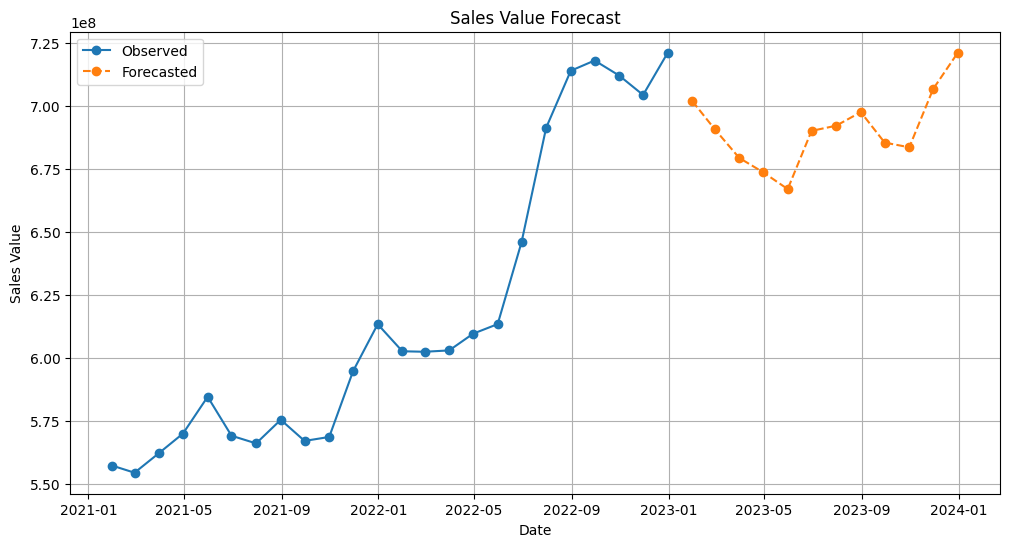

In [ ]:
# # Convert Period to datetime and handle errors
# df["Period"] = pd.to_datetime(df["Period"], errors="coerce")

# Remove rows with invalid dates
df_sales = df.loc[:, ["Period", "Sales_Value"]].dropna(subset=["Period"])

# Set Period as index
df_sales.set_index("Period", inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_sales.index, df_sales["Sales_Value"], marker='o')
plt.title("Sales over Time")
plt.xlabel("Time")
plt.ylabel("Sales Value")
plt.grid(True)
plt.show()

# Aggregate sales data by month
monthly_sales = df_sales.resample('M').sum()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales_Value'], marker='o')
plt.title('Monthly Sales Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.grid(True)
plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales['Sales_Value'], model='additive', period=12)

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
ax1.plot(monthly_sales.index, monthly_sales['Sales_Value'], marker='o', linestyle='-')
ax1.set_title('Original Time Series')
ax2.plot(monthly_sales.index, decomposition.trend, marker='o', linestyle='-')
ax2.set_title('Trend Component')
ax3.plot(monthly_sales.index, decomposition.seasonal, marker='o', linestyle='-')
ax3.set_title('Seasonal Component')
ax4.plot(monthly_sales.index, decomposition.resid, marker='o', linestyle='-')
ax4.set_title('Residual Component')
plt.tight_layout()
plt.show()

# Build and fit the model
model = ExponentialSmoothing(monthly_sales['Sales_Value'], seasonal='add', seasonal_periods=12).fit()

# Forecast for the next 12 months
forecast = model.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales_Value'], marker='o', label='Observed')
future_dates = [monthly_sales.index.max() + pd.DateOffset(months=i) for i in range(1, 13)]
forecast_df = pd.DataFrame({'Period': future_dates, 'Sales_Value': forecast})
plt.plot(forecast_df['Period'], forecast_df['Sales_Value'], marker='o', linestyle='--', label='Forecasted')
plt.title('Sales Value Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.legend()
plt.grid(True)
plt.show()
